# 🎬🍿 PROJETO NETFLIX 🍿🎬

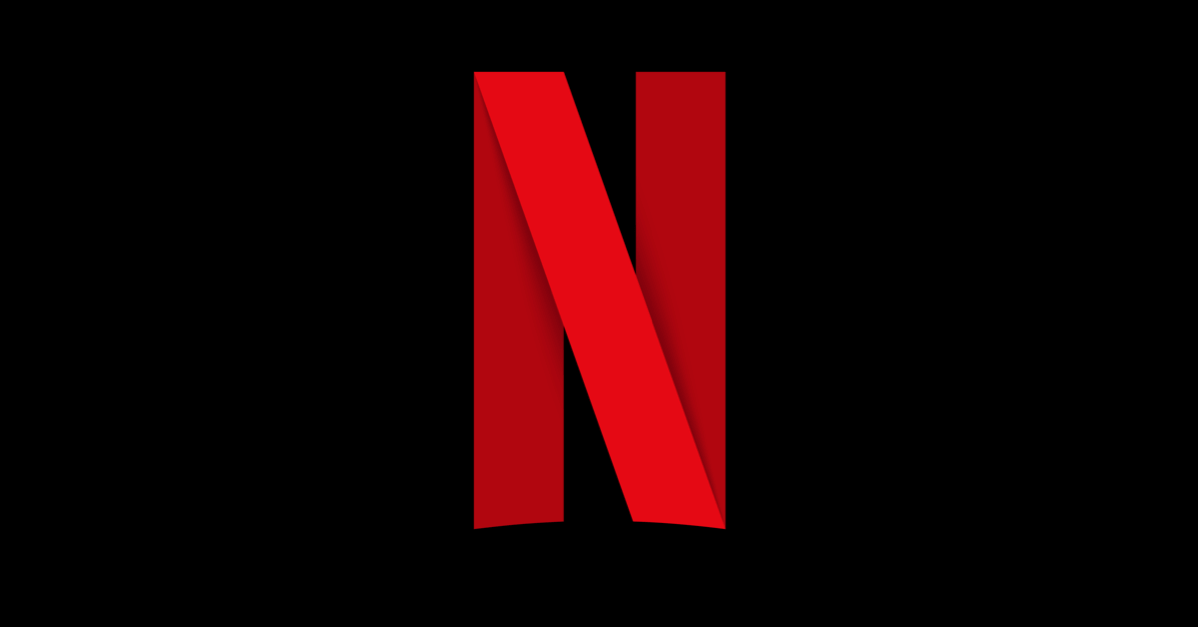

# 🎬 Banco de Dados de Streaming (Estilo Netflix) com SQLite

Este notebook cria e popula um **banco de dados em SQLite** para uma empresa de streaming similar à Netflix.  
O objetivo é **entender a modelagem de dados** e **testar consultas** em um exemplo prático.

---

## 📌 Estrutura do Banco de Dados

O banco possui as seguintes entidades principais:

- **Planos** → Armazena os tipos de assinatura (Básico, Padrão, Premium).  
- **Usuários** → Quem assina a plataforma.  
- **Perfis** → Perfis de cada conta (adulto, infantil).  
- **Gêneros** → Categorias dos conteúdos.  
- **Conteúdos** → Filmes, Séries, Documentários.  
- **Episódios** → Apenas para séries.  
- **Elenco** → Atores, diretores, roteiristas.  
- **Conteúdo_Elenco** → Relacionamento N:N entre conteúdos e elenco.  
- **Progresso_Visualizacao** → Onde o usuário parou de assistir.  
- **Favoritos** → Lista para assistir depois.  
- **Avaliações** → Nota e comentários do usuário.  

---


In [8]:
# 📦 Importando bibliotecas
import sqlite3

# Conectar (ou criar) o banco de dados SQLite
conn = sqlite3.connect("netflix.db")
cursor = conn.cursor()


## 🏗️ Criação das Tabelas

Abaixo criamos todas as tabelas do modelo relacional da Netflix.


In [9]:
cursor.executescript("""
DROP TABLE IF EXISTS Avaliacoes;
DROP TABLE IF EXISTS Favoritos;
DROP TABLE IF EXISTS Progresso_Visualizacao;
DROP TABLE IF EXISTS Conteudo_Elenco;
DROP TABLE IF EXISTS Episodios;
DROP TABLE IF EXISTS Conteudos;
DROP TABLE IF EXISTS Elenco;
DROP TABLE IF EXISTS Generos;
DROP TABLE IF EXISTS Perfis;
DROP TABLE IF EXISTS Usuarios;
DROP TABLE IF EXISTS Planos;

CREATE TABLE Planos (
    plano_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome_plano TEXT NOT NULL,
    preco REAL NOT NULL,
    qtd_telas INTEGER,
    qualidade_video TEXT
);

CREATE TABLE Usuarios (
    usuario_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    senha_hash TEXT NOT NULL,
    data_cadastro TEXT,
    plano_id INTEGER,
    FOREIGN KEY (plano_id) REFERENCES Planos(plano_id)
);

CREATE TABLE Perfis (
    perfil_id INTEGER PRIMARY KEY AUTOINCREMENT,
    usuario_id INTEGER,
    nome_perfil TEXT NOT NULL,
    tipo TEXT,
    idioma_preferido TEXT,
    FOREIGN KEY (usuario_id) REFERENCES Usuarios(usuario_id)
);

CREATE TABLE Generos (
    genero_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome_genero TEXT NOT NULL
);

CREATE TABLE Conteudos (
    conteudo_id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    tipo TEXT CHECK(tipo IN ('Filme', 'Série', 'Documentário')),
    ano_lancamento INTEGER,
    classificacao_etaria TEXT,
    duracao INTEGER,
    genero_id INTEGER,
    FOREIGN KEY (genero_id) REFERENCES Generos(genero_id)
);

CREATE TABLE Episodios (
    episodio_id INTEGER PRIMARY KEY AUTOINCREMENT,
    conteudo_id INTEGER,
    temporada INTEGER,
    numero_episodio INTEGER,
    titulo TEXT,
    duracao INTEGER,
    FOREIGN KEY (conteudo_id) REFERENCES Conteudos(conteudo_id)
);

CREATE TABLE Elenco (
    elenco_id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    tipo TEXT
);

CREATE TABLE Conteudo_Elenco (
    conteudo_id INTEGER,
    elenco_id INTEGER,
    papel TEXT,
    PRIMARY KEY (conteudo_id, elenco_id),
    FOREIGN KEY (conteudo_id) REFERENCES Conteudos(conteudo_id),
    FOREIGN KEY (elenco_id) REFERENCES Elenco(elenco_id)
);

CREATE TABLE Progresso_Visualizacao (
    progresso_id INTEGER PRIMARY KEY AUTOINCREMENT,
    perfil_id INTEGER,
    conteudo_id INTEGER,
    episodio_id INTEGER,
    tempo_assistido INTEGER,
    data_ultima_visualizacao TEXT,
    FOREIGN KEY (perfil_id) REFERENCES Perfis(perfil_id),
    FOREIGN KEY (conteudo_id) REFERENCES Conteudos(conteudo_id),
    FOREIGN KEY (episodio_id) REFERENCES Episodios(episodio_id)
);

CREATE TABLE Favoritos (
    favorito_id INTEGER PRIMARY KEY AUTOINCREMENT,
    perfil_id INTEGER,
    conteudo_id INTEGER,
    data_adicao TEXT,
    FOREIGN KEY (perfil_id) REFERENCES Perfis(perfil_id),
    FOREIGN KEY (conteudo_id) REFERENCES Conteudos(conteudo_id)
);

CREATE TABLE Avaliacoes (
    avaliacao_id INTEGER PRIMARY KEY AUTOINCREMENT,
    perfil_id INTEGER,
    conteudo_id INTEGER,
    nota INTEGER,
    comentario TEXT,
    data_avaliacao TEXT,
    FOREIGN KEY (perfil_id) REFERENCES Perfis(perfil_id),
    FOREIGN KEY (conteudo_id) REFERENCES Conteudos(conteudo_id)
);
""")


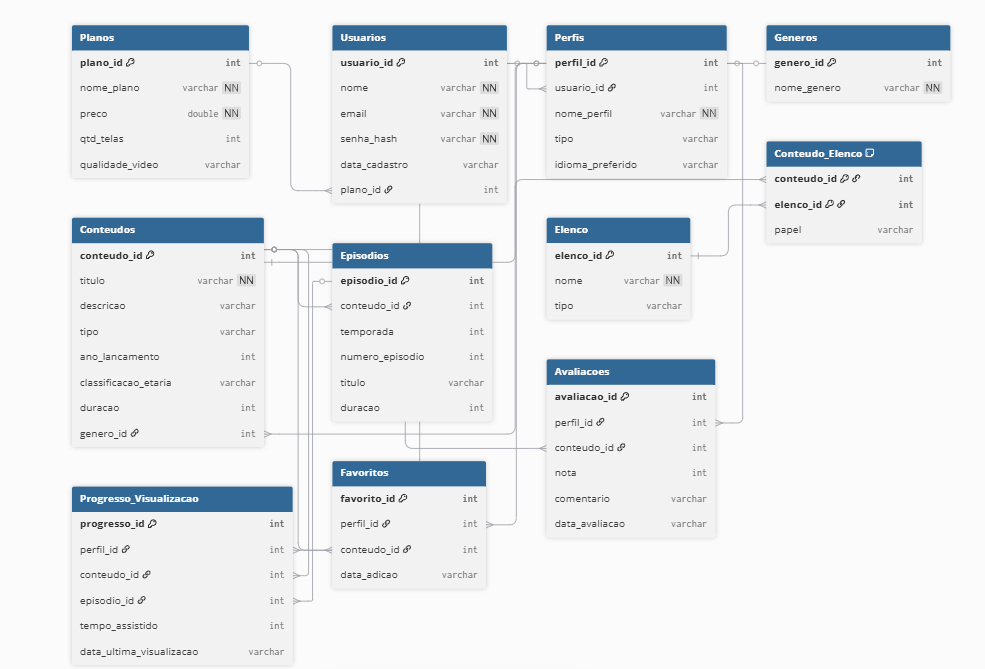

## 📥 Populando o Banco de Dados com Exemplos

Agora vamos inserir alguns dados fictícios de exemplo:
- Planos
- Usuários
- Perfis
- Gêneros
- Conteúdos (Matrix e Stranger Things)
- Episódios
- Elenco
- Relacionamentos (Conteúdo_Elenco, Progresso, Favoritos, Avaliações)


In [10]:
# Inserindo planos
cursor.executemany("""
INSERT INTO Planos (nome_plano, preco, qtd_telas, qualidade_video)
VALUES (?, ?, ?, ?)
""", [
    ("Básico", 19.90, 1, "SD"),
    ("Padrão", 29.90, 2, "HD"),
    ("Premium", 39.90, 4, "4K")
])

# Usuário
cursor.execute("""
INSERT INTO Usuarios (nome, email, senha_hash, data_cadastro, plano_id)
VALUES (?, ?, ?, ?, ?)
""", ("João Silva", "joao@example.com", "123456hash", "2025-10-01", 2))

# Perfis
cursor.executemany("""
INSERT INTO Perfis (usuario_id, nome_perfil, tipo, idioma_preferido)
VALUES (?, ?, ?, ?)
""", [
    (1, "João", "Adulto", "Português"),
    (1, "Maria", "Infantil", "Inglês")
])

# Gêneros
cursor.executemany("""
INSERT INTO Generos (nome_genero) VALUES (?)
""", [("Ação",), ("Drama",), ("Comédia",)])

# Conteúdos
cursor.executemany("""
INSERT INTO Conteudos (titulo, descricao, tipo, ano_lancamento, classificacao_etaria, duracao, genero_id)
VALUES (?, ?, ?, ?, ?, ?, ?)
""", [
    ("Matrix", "Um hacker descobre a verdade sobre sua realidade.", "Filme", 1999, "16+", 136, 1),
    ("Stranger Things", "Mistérios sobrenaturais em uma pequena cidade.", "Série", 2016, "14+", None, 2)
])

# Episódios
cursor.executemany("""
INSERT INTO Episodios (conteudo_id, temporada, numero_episodio, titulo, duracao)
VALUES (?, ?, ?, ?, ?)
""", [
    (2, 1, 1, "Capítulo Um: O Desaparecimento de Will Byers", 50),
    (2, 1, 2, "Capítulo Dois: A Estranha da Maple Street", 48)
])

# Elenco
cursor.executemany("""
INSERT INTO Elenco (nome, tipo)
VALUES (?, ?)
""", [
    ("Keanu Reeves", "Ator"),
    ("Winona Ryder", "Atriz"),
    ("Irmãos Duffer", "Diretores")
])

# Relacionamento Conteúdo-Elenco
cursor.executemany("""
INSERT INTO Conteudo_Elenco (conteudo_id, elenco_id, papel)
VALUES (?, ?, ?)
""", [
    (1, 1, "Protagonista"),
    (2, 2, "Atriz principal"),
    (2, 3, "Diretores")
])

# Progresso
cursor.execute("""
INSERT INTO Progresso_Visualizacao (perfil_id, conteudo_id, episodio_id, tempo_assistido, data_ultima_visualizacao)
VALUES (?, ?, ?, ?, ?)
""", (1, 2, 1, 1200, "2025-10-02"))

# Favoritos
cursor.execute("""
INSERT INTO Favoritos (perfil_id, conteudo_id, data_adicao)
VALUES (?, ?, ?)
""", (2, 1, "2025-10-02"))

# Avaliações
cursor.execute("""
INSERT INTO Avaliacoes (perfil_id, conteudo_id, nota, comentario, data_avaliacao)
VALUES (?, ?, ?, ?, ?)
""", (1, 1, 5, "Filme espetacular!", "2025-10-02"))

# Salvar alterações
conn.commit()


## 🔎 Consultas de Exemplo

Agora vamos realizar algumas consultas SQL para explorar o banco.


**Importar Biblioteca**

In [21]:
import pandas as pd

# Função auxiliar para rodar query e mostrar como DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

**🔎 Consulta 1: Lista de conteúdos disponíveis**

In [25]:
run_query("SELECT conteudo_id, titulo, tipo, ano_lancamento FROM Conteudos;")

,conteudo_id,titulo,tipo,ano_lancamento
0,1,Matrix,Filme,1999
1,2,Stranger Things,Série,2016


**🔎 Consulta 2: Avaliações com Usuário, Perfil, Conteúdo e Plano**

In [24]:
run_query("""
SELECT u.nome AS usuario,
       p.nome_perfil,
       c.titulo AS conteudo,
       a.nota,
       a.comentario,
       pl.nome_plano
FROM Avaliacoes a
JOIN Perfis p ON a.perfil_id = p.perfil_id
JOIN Usuarios u ON p.usuario_id = u.usuario_id
JOIN Conteudos c ON a.conteudo_id = c.conteudo_id
JOIN Planos pl ON u.plano_id = pl.plano_id;
""")


,usuario,nome_perfil,conteudo,nota,comentario,nome_plano
0,João Silva,João,Matrix,5,Filme espetacular!,Padrão


**🔎 Consulta 3: Perfis e seus favoritos**

In [27]:
run_query("""
SELECT p.nome_perfil, c.titulo AS favorito
FROM Favoritos f
JOIN Perfis p ON f.perfil_id = p.perfil_id
JOIN Conteudos c ON f.conteudo_id = c.conteudo_id;
""")


,nome_perfil,favorito
0,Maria,Matrix


**🔎 Consulta 4: Consulta qual o Plano e a qualidade de vídeo**

In [29]:
run_query("""
SELECT u.nome AS usuario,
       u.email,
       p.nome_plano,
       p.preco,
       p.qualidade_video
FROM Usuarios u
JOIN Planos p ON u.plano_id = p.plano_id;
""")


,usuario,email,nome_plano,preco,qualidade_video
0,João Silva,joao@example.com,Padrão,29.9,HD


**🔎 Consulta 5: Onde o perfil João parou de assistir**

In [30]:
run_query("""
SELECT p.nome_perfil, c.titulo, e.titulo AS episodio, pv.tempo_assistido
FROM Progresso_Visualizacao pv
JOIN Perfis p ON pv.perfil_id = p.perfil_id
JOIN Conteudos c ON pv.conteudo_id = c.conteudo_id
LEFT JOIN Episodios e ON pv.episodio_id = e.episodio_id;
""")


,nome_perfil,titulo,episodio,tempo_assistido
0,João,Stranger Things,Capítulo Um: O Desaparecimento de Will Byers,1200


---
# ✅ Conclusão

Com este modelo simples de **banco de dados estilo Netflix**, conseguimos:
- Estruturar usuários, perfis e planos.  
- Relacionar conteúdos, episódios, gêneros e elenco.  
- Registrar progresso de visualização, favoritos e avaliações.  

Este é apenas um **exemplo didático**, mas já mostra como um sistema de streaming poderia ser modelado em banco de dados relacional.


In [31]:
def export_simple_dbml(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    print("Copie e cole isto no https://dbdiagram.io/:")
    print("═" * 60)
    
    # Listar tabelas
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%'")
    tables = [table[0] for table in cursor.fetchall()]
    
    # 1. Criar tabelas
    for table in tables:
        print(f"Table {table} {{")
        
        cursor.execute(f"PRAGMA table_info({table})")
        columns = cursor.fetchall()
        
        for col in columns:
            col_id, col_name, col_type, not_null, default_value, pk = col
            
            # Tipo simplificado
            simple_type = 'int' if 'int' in col_type.lower() else 'varchar'
            if 'date' in col_type.lower(): simple_type = 'date'
            if 'float' in col_type.lower() or 'real' in col_type.lower(): simple_type = 'double'
            
            # Apenas constraints básicas
            constraints = []
            if pk: constraints.append('primary key')
            if not_null: constraints.append('not null')
            
            if constraints:
                print(f"  {col_name} {simple_type} [{', '.join(constraints)}]")
            else:
                print(f"  {col_name} {simple_type}")
        
        print("}")
        print("")
    
    # 2. Adicionar relações (NO FINAL, nível top-level)
    print("// Relationships")
    for table in tables:
        cursor.execute(f"PRAGMA foreign_key_list({table})")
        fks = cursor.fetchall()
        
        for fk in fks:
            id, seq, ref_table, from_col, to_col, on_update, on_delete, match = fk
            print(f"Ref: {table}.{from_col} > {ref_table}.{to_col}")
    
    conn.close()

In [32]:
# Usar a função para criar Schema
export_simple_dbml('netflix.db')

Copie e cole isto no https://dbdiagram.io/:
════════════════════════════════════════════════════════════
Table Planos {
  plano_id int [primary key]
  nome_plano varchar [not null]
  preco double [not null]
  qtd_telas int
  qualidade_video varchar
}

Table Usuarios {
  usuario_id int [primary key]
  nome varchar [not null]
  email varchar [not null]
  senha_hash varchar [not null]
  data_cadastro varchar
  plano_id int
}

Table Perfis {
  perfil_id int [primary key]
  usuario_id int
  nome_perfil varchar [not null]
  tipo varchar
  idioma_preferido varchar
}

Table Generos {
  genero_id int [primary key]
  nome_genero varchar [not null]
}

Table Conteudos {
  conteudo_id int [primary key]
  titulo varchar [not null]
  descricao varchar
  tipo varchar
  ano_lancamento int
  classificacao_etaria varchar
  duracao int
  genero_id int
}

Table Episodios {
  episodio_id int [primary key]
  conteudo_id int
  temporada int
  numero_episodio int
  titulo varchar
  duracao int
}

Table Elenco 